In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import gzip
import glob
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [ ]:
# !pip install scprep

     |████████████████████████████████| 104 kB 4.5 MB/s 


In [ ]:
import scprep as scp
# The scprep require data of format (# of samples, # of features)

In [ ]:
ped_expression_1000 = pd.read_csv("/content/drive/MyDrive/ML4fungen/Final project/ped_expression_1000_test.csv", index_col=0, header=None, )
adult_expression_1000 = pd.read_csv("/content/drive/MyDrive/ML4fungen/Final project/adult_expression_1000_test.csv", index_col=0, header=None, )


In [ ]:
genes_list = ped_expression_1000.index

In [ ]:
print(ped_expression_1000.astype(bool).sum(axis=1))

0
MAGEA3        86
MAGEA12       78
IGF2-AS      218
HENMT1       256
MAGEA2B       43
            ... 
COL6A6        29
PCDHGA3      131
LOC730811     29
CLVS1        162
GPC5          42
Length: 1000, dtype: int64


In [ ]:
adult_expression_1000.astype(bool).sum(axis=1)

0
MAGEA3         3
MAGEA12        3
IGF2-AS        4
HENMT1        10
MAGEA2B        2
            ... 
COL6A6       140
PCDHGA3      827
LOC730811    133
CLVS1        811
GPC5         199
Length: 1000, dtype: int64

In [ ]:
ped_expression_1000

,1,2,3,4,5,6,7,8,9,10,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
0,,,,,,,,,,,,,,,,,,,,,
MAGEA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
MAGEA12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
IGF2-AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
HENMT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
MAGEA2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL6A6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
PCDHGA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.06527,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
LOC730811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Perform some data visualization

### Measure the number of cells in which each gene has non-negligible counts.



In [ ]:
capture_count_ped = scp.measure.gene_capture_count(ped_expression_1000.T)
capture_count_adult = scp.measure.gene_capture_count(adult_expression_1000.T)

In [ ]:
capture_count_ped

0
MAGEA3        86
MAGEA12       78
IGF2-AS      218
HENMT1       256
MAGEA2B       43
            ... 
COL6A6        29
PCDHGA3      131
LOC730811     29
CLVS1        162
GPC5          42
Name: capture_count, Length: 1000, dtype: int64

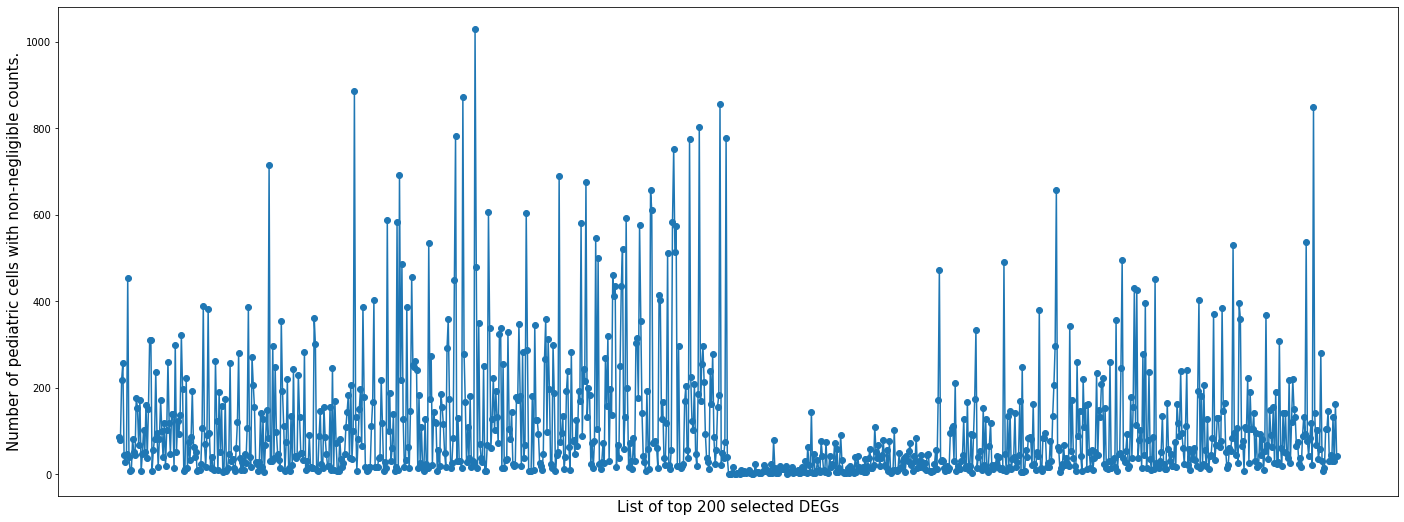

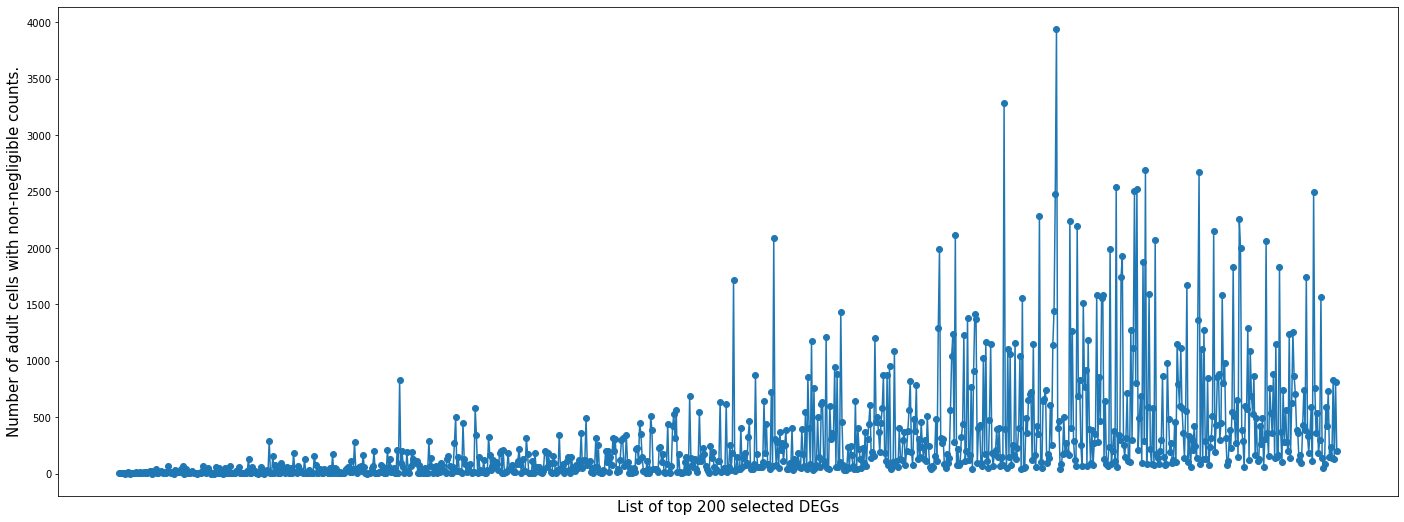

In [ ]:
plt.figure(figsize=(24, 9))
plt.plot(capture_count_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of top 200 selected DEGs", fontsize=15)
plt.ylabel("Number of pediatric cells with non-negligible counts.", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(capture_count_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of top 200 selected DEGs", fontsize=15)
plt.ylabel("Number of adult cells with non-negligible counts.", fontsize=15)   
plt.show()

### Measure the expression of a set of genes in each cell.

In [ ]:
# Measure the expression of a set of genes in each cell.
gene_set_expression_ped = scp.measure.gene_set_expression(ped_expression_1000.T)
gene_set_expression_adult = scp.measure.gene_set_expression(adult_expression_1000.T)

/usr/local/lib/python3.7/dist-packages/scprep/select.py:370: UserWarning: No selection conditions provided. Returning all columns.
  "No selection conditions provided. Returning all columns.", UserWarning
/usr/local/lib/python3.7/dist-packages/scprep/select.py:370: UserWarning: No selection conditions provided. Returning all columns.
  "No selection conditions provided. Returning all columns.", UserWarning


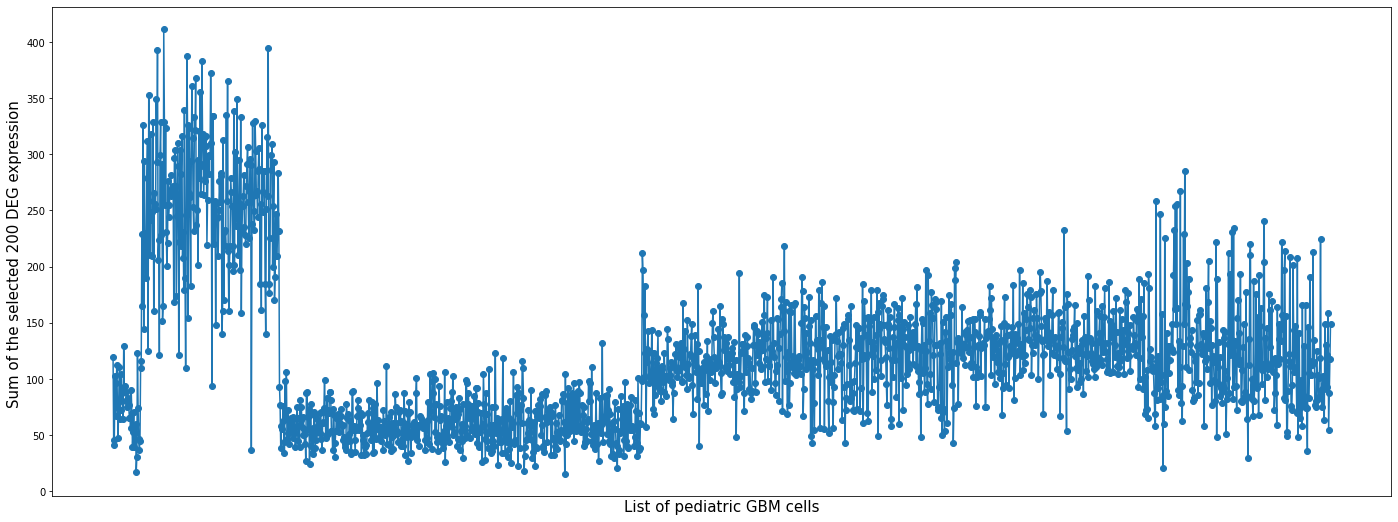

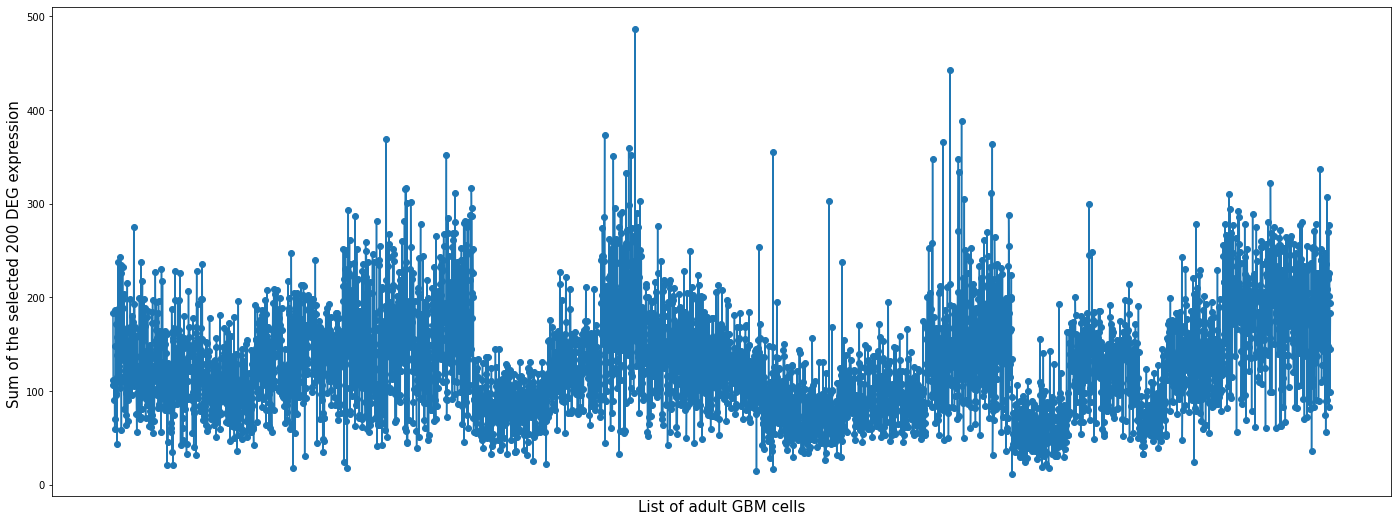

In [ ]:
plt.figure(figsize=(24, 9))
plt.plot(gene_set_expression_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of pediatric GBM cells", fontsize=15)
plt.ylabel("Sum of the selected 200 DEG expression ", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(gene_set_expression_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of adult GBM cells", fontsize=15)
plt.ylabel("Sum of the selected 200 DEG expression ", fontsize=15)   
plt.show()


### Measure the variability of each gene in a dataset.


In [ ]:
variability_ped = scp.measure.gene_variability(ped_expression_1000.T)
variability_adult = scp.measure.gene_variability(adult_expression_1000.T)

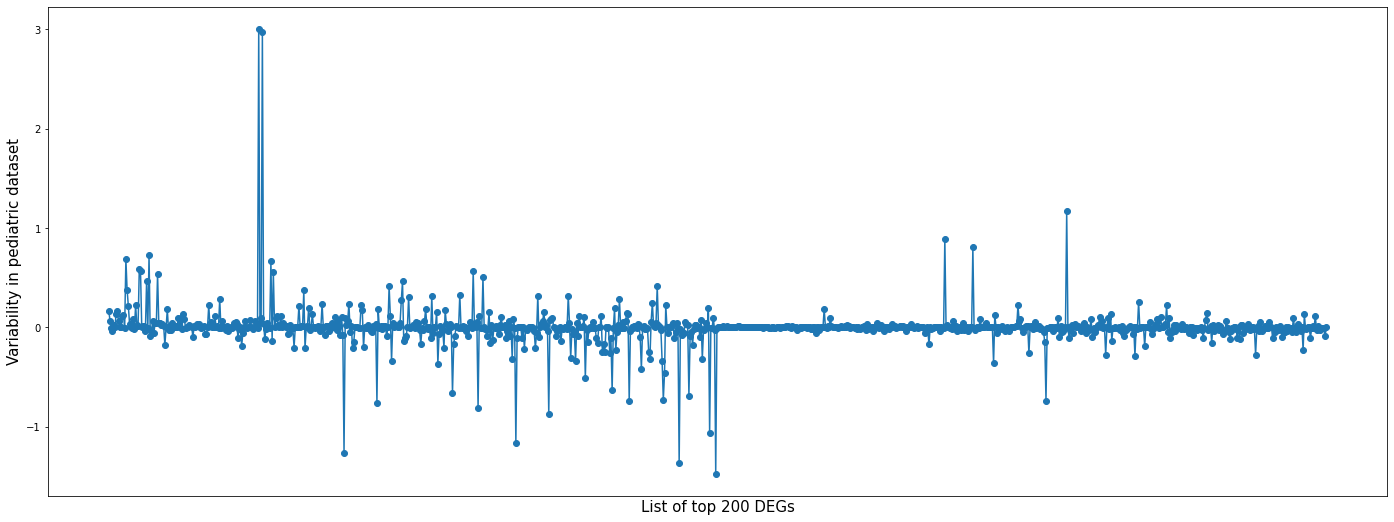

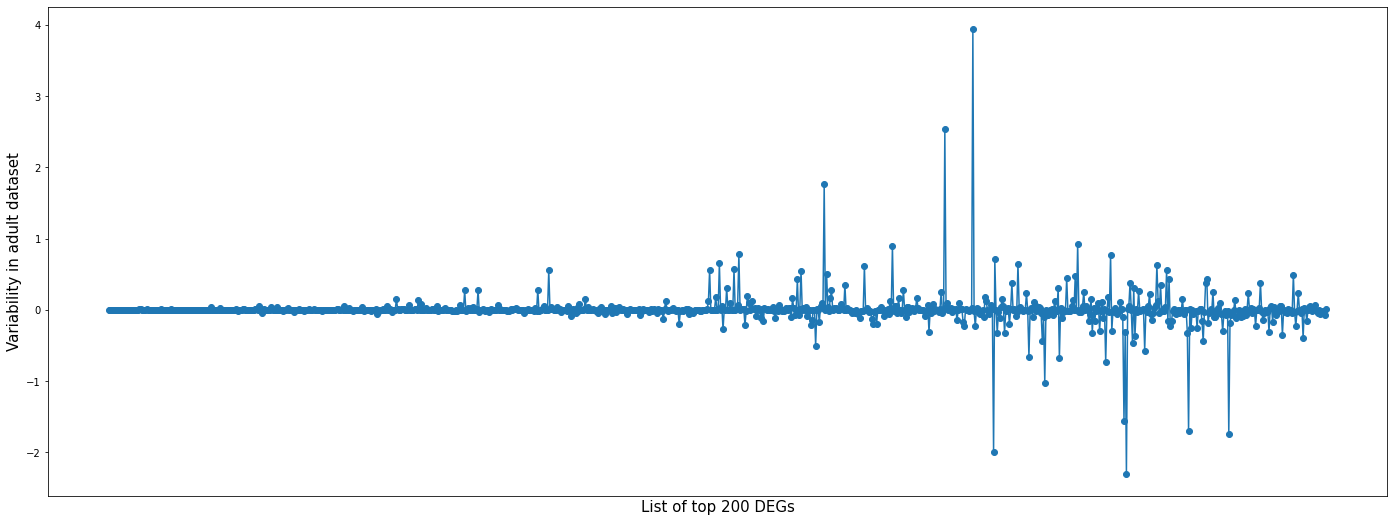

In [ ]:
plt.figure(figsize=(24, 9))
plt.plot(variability_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel("List of top 200 DEGs", fontsize=15)
plt.ylabel("Variability in pediatric dataset", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(variability_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel("List of top 200 DEGs", fontsize=15)
plt.ylabel("Variability in adult dataset", fontsize=15)   
plt.show()

# Perform data filtering

### Filter all genes with zero counts across all cells.


In [ ]:
# Looks like none of the genes are filtered out! 
ped_expression_1000 = scp.filter.filter_empty_genes(ped_expression_1000.T)
adult_expression_1000 = scp.filter.filter_empty_genes(adult_expression_1000.T)

# this filtering technique is equivalent to: 
# ped_expression_200.loc[:, (ped_expression_200 != 0).any(axis=0)]

### Remove all cells with zero library size.

In [ ]:
# Looks like we filtered out several "empty" cells
ped_expression_1000_filtered = scp.filter.filter_empty_cells(ped_expression_1000)
adult_expression_1000_filtered = scp.filter.filter_empty_cells(adult_expression_1000)

### IMPORTANT: Other filtering method that I could try (things to try in the future): 
1. Remove cells with total expression of a gene set above or below a threshold.

2. Filter all genes with negligible counts in all but a few cells (rare genes)

But for now, I'll do the basics -- just filter out genes with zero counts and zero library size. 

# Merge the pediatric dataset with the adult dataset

In [ ]:
print("shape of the ped dataset: ", ped_expression_1000_filtered.shape)
print("shape of the adult dataset: ", adult_expression_1000_filtered.shape)

shape of the ped dataset:  (1947, 1000)
shape of the adult dataset:  (4916, 1000)


In [ ]:
(ped_expression_1000_filtered.shape[0])

1947

### IMPORTANT: Assign class name to pediatric and adult malignant cells

0: pediatric GBM 

1: adult GBM

In [ ]:
class_ped = np.zeros(ped_expression_1000_filtered.shape[0], dtype=int)
ped_expression_1000_filtered['class'] = class_ped

class_adult = np.ones(adult_expression_1000_filtered.shape[0], dtype=int)
adult_expression_1000_filtered['class'] = class_adult

### merge the two datasets into a combined dataset

In [ ]:
frames = [ped_expression_1000_filtered, adult_expression_1000_filtered]

expression_combined = pd.concat(frames)

### Fix the index of the combined dataset, because we have filtered out some data, now the indices are messed up

In [ ]:
expression_combined.index = range(len(expression_combined))

In [ ]:
expression_combined

,MAGEA3,MAGEA12,IGF2-AS,HENMT1,MAGEA2B,MAGEA2,DIO3,KHDRBS2,CLEC10A,NPBWR2,...,PLD5,EVA1C,LOC100506497,LOC100873065,COL6A6,PCDHGA3,LOC730811,CLVS1,GPC5,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.03101,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,2.23836,0.0,0.0,0.0,0.816730,0.0,3.34338,0.00000,1
6859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,1.29283,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,1
6860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,2.540050,0.0,0.00000,1.87897,1
6861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.387715,0.0,0.00000,0.00000,1


### create the label dataset

In [ ]:
y = expression_combined['class']

In [ ]:
dataset = expression_combined.drop('class', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# Train_test_split

In [ ]:
from sklearn.model_selection import train_test_split
y_train, y_test = train_test_split(y, test_size=0.33, random_state=42, stratify=y)
X_train = dataset.loc[y_train.index]
X_test = dataset.loc[y_test.index]

In [ ]:
print("shape of X_train", X_train.shape)
print("shape of y_train", y_train.shape)
print("shape of X_test", X_test.shape)
print("shape of y_test", y_test.shape)

shape of X_train (4598, 1000)
shape of y_train (4598,)
shape of X_test (2265, 1000)
shape of y_test (2265,)


# KNN model

In [ ]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV


In [ ]:
knn = KNeighborsClassifier()
k = np.arange(10)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])}])

### Print out the best parameters

In [ ]:
knn_clf.best_params_

{'n_neighbors': 10}

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=10)

# training 
model_KNN.fit(X_train,y_train)

# prediction
predictions_KNN = model_KNN.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions_KNN))

0.9496688741721855


### Visualize the confusion matrix

(2265,)


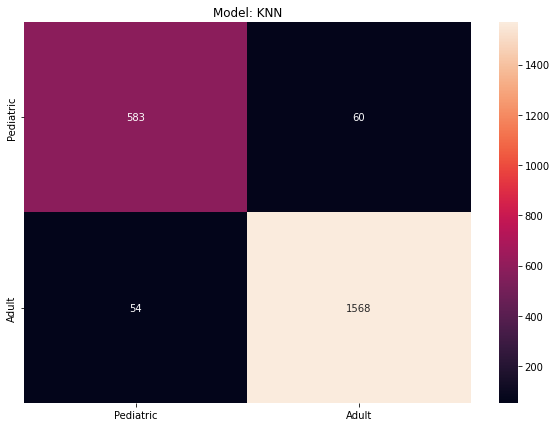

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(y_test.shape)
cfn_matrix_knn = confusion_matrix(y_test,predictions_KNN)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: KNN')
sns.heatmap(cfn_matrix_knn, annot = True, fmt = 'd', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions_KNN, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.92      0.91      0.91       643
       Adult       0.96      0.97      0.96      1622

    accuracy                           0.95      2265
   macro avg       0.94      0.94      0.94      2265
weighted avg       0.95      0.95      0.95      2265



# Naive Bayes

In [ ]:
model = GaussianNB()

# training 
model.fit(X_train,y_train)

# prediction
predictions = model.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions))

0.9448123620309051


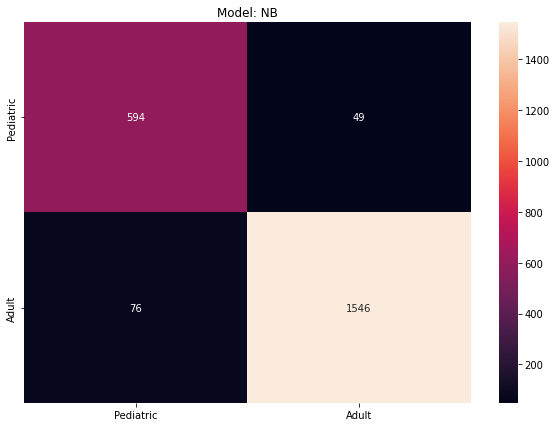

In [ ]:
cfn_matrix_NB = confusion_matrix(y_test,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: NB')
sns.heatmap(cfn_matrix_NB, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.89      0.92      0.90       643
       Adult       0.97      0.95      0.96      1622

    accuracy                           0.94      2265
   macro avg       0.93      0.94      0.93      2265
weighted avg       0.95      0.94      0.95      2265



# Logistic regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='auto')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100], 
              'penalty': ['l1', 'l2'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

grid_search = GridSearchCV(lreg_clf, param_grid, cv=5, scoring= 'precision_macro' ,return_train_score=True)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='precision_macro')

In [ ]:
X_train.shape

(4598, 1000)

In [ ]:
grid_search.best_params_


{'C': 100, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
lreg_clf= LogisticRegression(multi_class='auto', solver='saga', C=100, penalty= 'l1')
lreg_clf.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:354: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  ConvergenceWarning,


LogisticRegression(C=100, penalty='l1', solver='saga')

In [ ]:
from sklearn.metrics import precision_score

y_pred_train = lreg_clf.predict(X_train)
y_pred_test = lreg_clf.predict(X_test)

lreg_train_precision_score = precision_score(y_train, y_pred_train, average='binary')
lreg_test_precision_score = precision_score(y_test, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(lreg_train_precision_score))
print('Test Precision score: {}'
      .format(lreg_test_precision_score))

Train Precision score: 1.0
Test Precision score: 0.9895769466584917


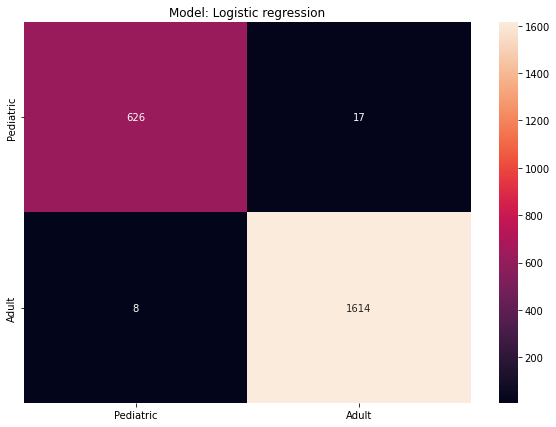

In [ ]:
predictions = lreg_clf.predict(X_test)

cfn_matrix_NB = confusion_matrix(y_test,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: Logistic regression')
sns.heatmap(cfn_matrix_NB, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.99      0.97      0.98       643
       Adult       0.99      1.00      0.99      1622

    accuracy                           0.99      2265
   macro avg       0.99      0.98      0.99      2265
weighted avg       0.99      0.99      0.99      2265



# Decision tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

param_grid = {
            'max_depth': [5, 10, 20, 50, 100], 
            'splitter': ['best', 'random'],
            'min_samples_split':[1,2,3,4,5,10,20],
            'max_features': ['auto', 'sqrt', 'log2', 'None', 'int', 'float'],
            }

grid_search_decision_tree = GridSearchCV(decision_tree, param_grid, cv = 5, return_train_score=True, verbose = 4, scoring = "accuracy", refit = True)
grid_search_decision_tree.fit(X_train,y_train)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=5, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', 'None', 'int',
                                          'float'],
                         'min_samples_split': [1, 2, 3, 4, 5, 10, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=4)

In [ ]:
print(grid_search_decision_tree.best_params_)

{'max_depth': 50, 'max_features': 'sqrt', 'min_samples_split': 5, 'splitter': 'best'}


In [ ]:
optimized_dt = DecisionTreeClassifier(max_depth = 50, max_features = 'sqrt', min_samples_split = 5, splitter = 'best')
optimized_dt.fit(X_train,y_train)

print('Train score: ', optimized_dt.score(X_train,y_train))
print('Test score: ', optimized_dt.score(X_test, y_test))

Train score:  0.9902131361461505
Test score:  0.9236203090507726


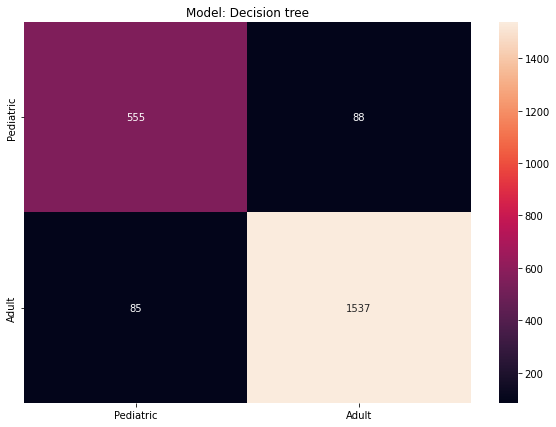

In [ ]:
predictions_dt = optimized_dt.predict(X_test)

cfn_matrix_dt = confusion_matrix(y_test,predictions_dt)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_dt, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions_dt, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.87      0.86      0.87       643
       Adult       0.95      0.95      0.95      1622

    accuracy                           0.92      2265
   macro avg       0.91      0.91      0.91      2265
weighted avg       0.92      0.92      0.92      2265



In [ ]:
feature_importances_dt = pd.DataFrame(optimized_dt.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances_dt.head(10)


,importance
0,
PDPN,0.180423
KHDRBS2,0.067710
ZNF560,0.059250
MYO1B,0.046559
GPR124,0.040769
PPAPDC1A,0.038888
COL1A1,0.036870
SNAR-B2,0.034732
IGF2,0.029653


# Random Forest model

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)

param_grid ={
          'max_depth': [6,8,10,12,14],
           'n_estimators':[100,200,300,400,500]}

grid_search = GridSearchCV(rf_clf, param_grid,cv=5, scoring='precision_macro', return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='precision_macro')

In [ ]:
grid_search.best_params_

{'max_depth': 14, 'n_estimators': 500}

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=14)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=14, n_estimators=200)

In [ ]:
from sklearn.metrics import precision_score

y_pred_train = rf_clf.predict(X_train)
y_pred_test = rf_clf.predict(X_test)

rf_train_precision_score = precision_score(y_train, y_pred_train, average='binary')
rf_test_precision_score = precision_score(y_test, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(rf_train_precision_score))
print('Test Precision score: {}'
      .format(rf_test_precision_score))


Train Precision score: 0.9743357487922706
Test Precision score: 0.946236559139785


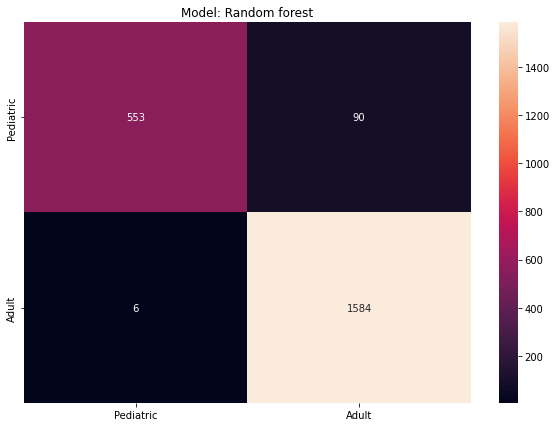

In [ ]:
predictions_rf = rf_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_rf = confusion_matrix(y_test,predictions_rf)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Random forest')
sns.heatmap(cfn_matrix_rf, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions_rf, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.99      0.86      0.92       643
       Adult       0.95      1.00      0.97      1590

    accuracy                           0.96      2233
   macro avg       0.97      0.93      0.95      2233
weighted avg       0.96      0.96      0.96      2233



In [ ]:
feature_importances_rf = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances_rf.head(10)


,importance
0,
TUSC3,0.053391
CTHRC1,0.043498
IGF2,0.043425
RTN1,0.036485
KHDRBS2,0.034903
SNAR-B2,0.031527
SNAR-B1,0.029542
LOC650226,0.024792
PLCB4,0.023986


# Linear SVM

In [ ]:
model = LinearSVC()

# training 
model.fit(X_train,y_train)

# prediction
predictions = model.predict(X_test)

# accuracy 
print(accuracy_score(y_test,predictions))

0.9592476489028213


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


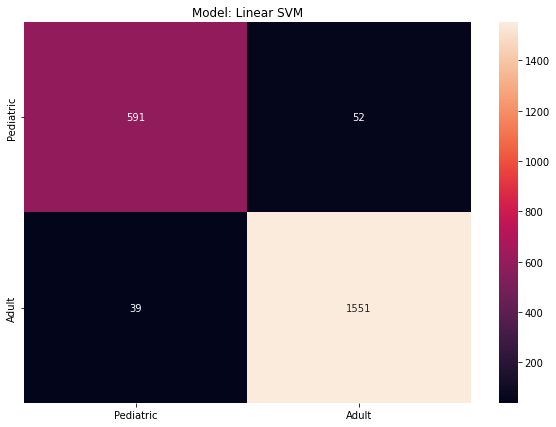

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_linear_svm = confusion_matrix(y_test,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Linear SVM')
sns.heatmap(cfn_matrix_linear_svm, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

# Kernalized SVM

In [ ]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf', random_state=0)

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10]},
             return_train_score=True, scoring='precision_macro')

In [ ]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [ ]:
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.001, probability=True, random_state=0)

KSVC_clf.fit(X_train, y_train)

SVC(C=10, gamma=0.001, probability=True, random_state=0)

In [ ]:
y_pred_train = KSVC_clf.predict(X_train)
y_pred_test = KSVC_clf.predict(X_test)

KSVC_train_precision_score = precision_score(y_train, y_pred_train, average='binary')
KSVC_test_precision_score = precision_score(y_test, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(KSVC_train_precision_score))
print('Test Precision score: {}'
      .format(KSVC_test_precision_score))

Train Precision score: 0.9850152905198777
Test Precision score: 0.9734567901234568


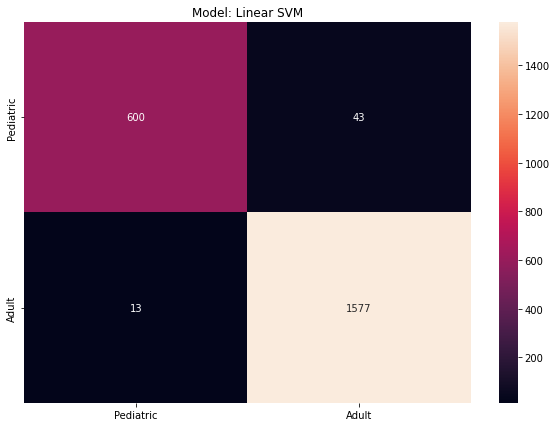

In [ ]:
predictions = KSVC_clf.predict(X_test)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_kernalized_svm = confusion_matrix(y_test,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Linear SVM')
sns.heatmap(cfn_matrix_kernalized_svm, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.98      0.93      0.96       643
       Adult       0.97      0.99      0.98      1590

    accuracy                           0.97      2233
   macro avg       0.98      0.96      0.97      2233
weighted avg       0.97      0.97      0.97      2233



# Gradient boosting model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=10)

param_grid ={
            'min_samples_split': range(100, 500, 50),
           'n_estimators':range(20,81,10),
           'min_samples_leaf': range(10,100,10),
           'max_depth': range(5,8,1)}


grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='precision_macro', return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': range(5, 8),
                         'min_samples_leaf': range(10, 100, 10),
                         'min_samples_split': range(100, 500, 50),
                         'n_estimators': range(20, 81, 10)},
             return_train_score=True, scoring='precision_macro')

In [ ]:
print(grid_search.best_params_)

{'max_depth': 7, 'min_samples_leaf': 10, 'min_samples_split': 100, 'n_estimators': 70}


In [ ]:
gbc = GradientBoostingClassifier(n_estimators=70, learning_rate=0.1, min_samples_split=100,min_samples_leaf=10,max_depth=7,max_features='sqrt',subsample=0.8,random_state=10)
gbc.fit(X_train, y_train)

print('Train score: ', gbc.score(X_train,y_train))
print('Test score: ', gbc.score(X_test, y_test))


Train score:  0.9854336790995365
Test score:  0.9659650694133453


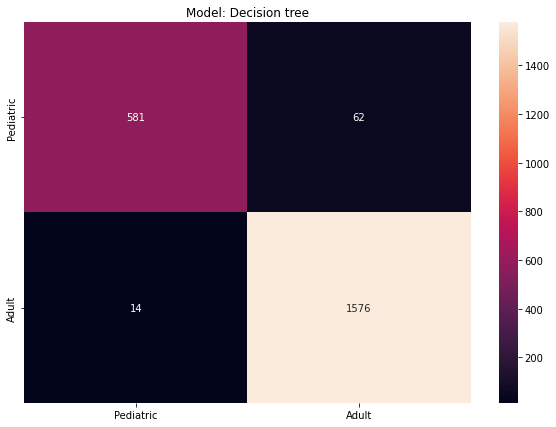

In [ ]:
predictions_gbc = gbc.predict(X_test)

cfn_matrix_gbc = confusion_matrix(y_test,predictions_gbc)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_gbc, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions_gbc, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.98      0.90      0.94       643
       Adult       0.96      0.99      0.98      1590

    accuracy                           0.97      2233
   macro avg       0.97      0.95      0.96      2233
weighted avg       0.97      0.97      0.97      2233



In [ ]:
feature_importances_gbc = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances_gbc.head(10)


,importance
0,
TUSC3,0.059915
COL1A2,0.056409
SNAR-B2,0.056310
KHDRBS2,0.050576
RANBP17,0.038303
LOC650226,0.035409
MET,0.033381
SNAR-B1,0.032344
RTN1,0.030381


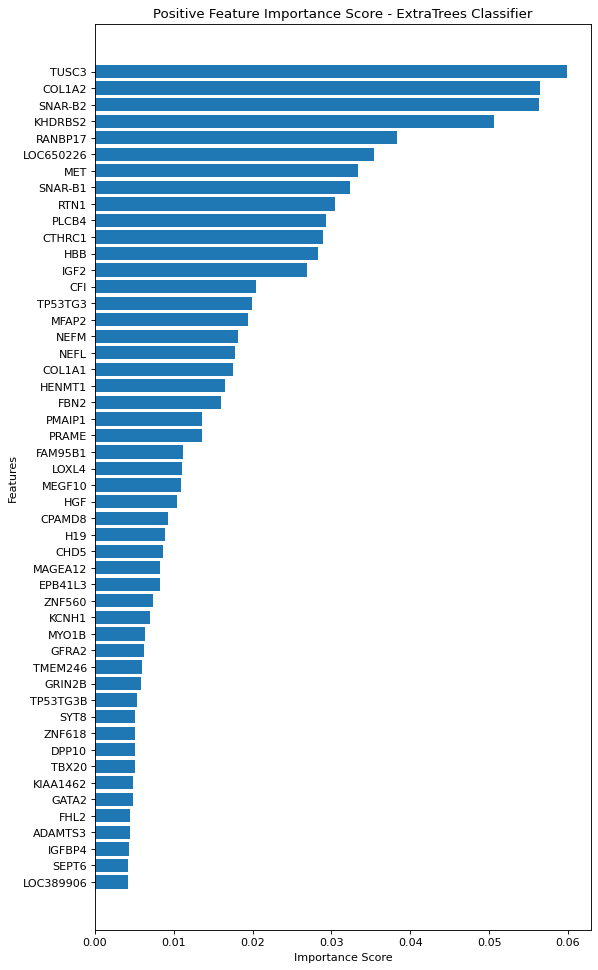

In [ ]:
pos_features = feature_importances_gbc.loc[feature_importances_gbc.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

# XGBoost model

In [ ]:
from xgboost import XGBClassifier
import xgboost as xgb

xgbc = XGBClassifier()

xgbc.fit(X_train, y_train)

y_train_preds = xgbc.predict(X_train)
y_test_preds = xgbc.predict(X_test)

xgb_train_precision_score = precision_score(y_train, y_train_preds, average='binary')
xgb_test_precision_score = precision_score(y_test, y_test_preds, average='binary')

print('Train Precision score: {}'
      .format(xgb_train_precision_score))
print('Test Precision score: {}'
      .format(xgb_test_precision_score))


Train Precision score: 0.9734138972809667
Test Precision score: 0.9557038834951457


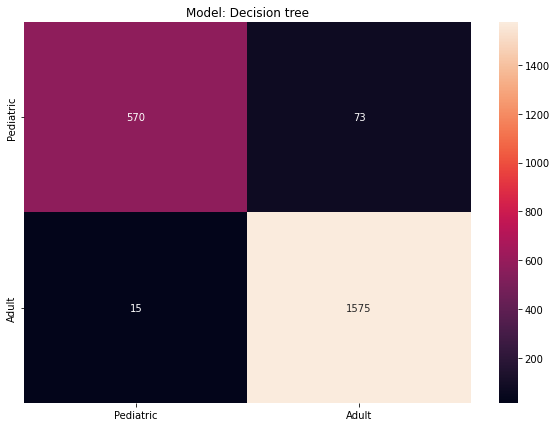

In [ ]:
predictions_xgbc = xgbc.predict(X_test)

cfn_matrix_xgbc = confusion_matrix(y_test,predictions_xgbc)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_xgbc, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [ ]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test, predictions_xgbc, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.97      0.89      0.93       643
       Adult       0.96      0.99      0.97      1590

    accuracy                           0.96      2233
   macro avg       0.97      0.94      0.95      2233
weighted avg       0.96      0.96      0.96      2233



In [ ]:
feature_importances_xgbc = pd.DataFrame(xgbc.feature_importances_,
                                   index = X_train.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [ ]:
feature_importances_xgbc.index


Index(['TUSC3', 'IGF2', 'PRAME', 'CTHRC1', 'LOC650226', 'KHDRBS2', 'SNAR-B1',
       'COL1A2', 'RTN1', 'MYO1B',
       ...
       'SMCP', 'PAX2', 'DIAPH3-AS2', 'CHD5', 'NRTN', 'CHAD', 'OR2L13', 'GNG8',
       'FZD9', 'ENPEP'],
      dtype='object', name=0, length=500)

In [ ]:


a = feature_importances_xgbc.index
b = feature_importances_gbc.index
c = feature_importances_dt.index
d = feature_importances_rf.index


# common_elements = list(set(a).intersection(set(b)))

In [ ]:
a = a[0:50]
b = b[0:50]
c = c[0:50]
d = d[0:50]

common_elements = list(set(a).intersection(set(b), set(c), set(d)))


In [ ]:
len(common_elements)

21

In [ ]:
common_elements

['COL1A2',
 'SNAR-B1',
 'MEGF10',
 'PRAME',
 'MET',
 'CTHRC1',
 'RANBP17',
 'NEFL',
 'IGF2',
 'COL1A1',
 'RTN1',
 'CFI',
 'GATA2',
 'HENMT1',
 'TP53TG3',
 'TUSC3',
 'MFAP2',
 'LOC650226',
 'KHDRBS2',
 'LOC389906',
 'HBB']